In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import json
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
df1 = pd.read_csv('covidVaccines.csv',  low_memory=False)

In [2]:
#You can create or remove cells as per your need

print(df1.head())
df1.shape
df1.isnull().sum()

      Date   FIPS  MMWR_week     Recip_County state  Completeness_pct  \
0  5/10/23  55129         19  Washburn County    WI              96.7   
1  5/10/23  19173         19    Taylor County    IA              97.3   
2  5/10/23  36059         19    Nassau County    NY              97.5   
3  5/10/23  48281         19  Lampasas County    TX              98.9   
4  5/10/23  26145         19   Saginaw County    MI              94.0   

   Administered_Dose1_Recip  Administered_Dose1_Pop_Pct  \
0                   11123.0                        70.8   
1                    3149.0                        51.4   
2                 1391226.0                        95.0   
3                   11678.0                        54.5   
4                  104075.0                        54.6   

   Administered_Dose1_Recip_5Plus  Administered_Dose1_Recip_5PlusPop_Pct  ...  \
0                         11097.0                                   73.9  ...   
1                          3145.0           

Date                                    0
FIPS                                    0
MMWR_week                               0
Recip_County                            0
state                                  81
                                    ...  
Bivalent_Booster_12Plus_Pop_Pct    965245
Bivalent_Booster_18Plus            963657
Bivalent_Booster_18Plus_Pop_Pct    965245
Bivalent_Booster_65Plus            963657
Bivalent_Booster_65Plus_Pop_Pct    965245
Length: 80, dtype: int64

In [4]:
extracted_column = df1['state']
state_counts = extracted_column.value_counts()
# Convert the Series to a DataFrame
state_counts_df = state_counts.reset_index()
state_counts_df.columns = ['State abbv', 'State Total']  # Renaming the columns
#state_counts_df.drop(['State Total'], inplace=True, axis=1)
# Now state_counts_df contains the counts of each state
print(state_counts_df)
df2 = state_counts_df

   State abbv  State Total
0          TX        81409
1          GA        51102
2          VA        42791
3          KY        38639
4          MO        37046
5          KS        33853
6          IL        32897
7          NC        32260
8          IA        31933
9          TN        30659
10         NE        30024
11         IN        29706
12         OH        28424
13         MN        28111
14         MI        26839
15         MS        26506
16         PR        25237
17         OK        24913
18         AR        24277
19         WI        23314
20         FL        21722
21         AL        21718
22         PA        21718
23         SD        21404
24         CO        20757
25         LA        20756
26         NY        20122
27         CA        18841
28         MT        18204
29         WV        17883
30         ND        17245
31         SC        15009
32         ID        14372
33         WA        12773
34         OR        11817
35         NM        10858
3

In [5]:
extracted_column = df1['Administered_Dose1_Recip']
print(extracted_column)
dose1_counts = extracted_column.value_counts()
dose1_counts_df = dose1_counts.reset_index()
print(dose1_counts_df)
dose1_counts_df.drop(['Administered_Dose1_Recip'], inplace=True, axis=1)
dose1_counts_df.columns = ['Dose 1 Total'] # Renaming the columns
df2 = pd.concat([df2, dose1_counts_df], axis=1)

0            11123.0
1             3149.0
2          1391226.0
3            11678.0
4           104075.0
             ...    
1048570       1067.0
1048571     116230.0
1048572        581.0
1048573       4040.0
1048574       8652.0
Name: Administered_Dose1_Recip, Length: 1048575, dtype: float64
        Administered_Dose1_Recip  count
0                            0.0  11535
1                          513.0    126
2                         1244.0    126
3                         1865.0    118
4                         2142.0    116
...                          ...    ...
207861                   92396.0      1
207862                  223682.0      1
207863                  357876.0      1
207864                  872225.0      1
207865                  116230.0      1

[207866 rows x 2 columns]


In [6]:
extracted_column = df1['Booster_Doses']
print(extracted_column)
boosterDoses_counts = extracted_column.value_counts()
boosterDoses_counts_df = boosterDoses_counts.reset_index()
print(boosterDoses_counts_df)

boosterDoses_counts_df.drop(['Booster_Doses'], inplace=True, axis=1)
boosterDoses_counts_df.columns = ['Booster Doses Total']
df2 = pd.concat([df2, boosterDoses_counts_df], axis=1)

0            6800.0
1            1804.0
2          548555.0
3            4217.0
4           58722.0
             ...   
1048570         NaN
1048571         NaN
1048572         NaN
1048573         NaN
1048574         NaN
Name: Booster_Doses, Length: 1048575, dtype: float64
        Booster_Doses  count
0                 0.0   2007
1               324.0    203
2               360.0    184
3                83.0    183
4               466.0    178
...               ...    ...
114267        28554.0      1
114268       314423.0      1
114269       170222.0      1
114270        58095.0      1
114271        52641.0      1

[114272 rows x 2 columns]


In [7]:

df3 = df2.head(60)
df3.drop(['Dose 1 Total'], axis=1, inplace=True)

/var/folders/pb/80487km91b9djm13mzrc_39w0000gn/T/ipykernel_43278/4184338426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(['Dose 1 Total'], axis=1, inplace=True)


In [8]:
states = pd.read_csv('states.csv')
states = states.sort_values(by='Abbreviation', ascending=True)
df3 = df3.sort_values(by='State abbv', ascending=True)
print(df3)

   State abbv  State Total  Booster Doses Total
36         AK       9584.0                144.0
21         AL      21718.0                154.0
18         AR      24277.0                157.0
54         AS        320.0                138.0
43         AZ       5109.0                142.0
27         CA      18841.0                150.0
24         CO      20757.0                151.0
47         CT       2877.0                140.0
53         DC        638.0                139.0
51         DE       1278.0                139.0
20         FL      21722.0                155.0
58         FM        319.0                137.0
1          GA      51102.0                203.0
52         GU        639.0                139.0
49         HI       1870.0                140.0
8          IA      31933.0                169.0
32         ID      14372.0                148.0
6          IL      32897.0                174.0
11         IN      29706.0                163.0
5          KS      33853.0              

In [9]:
age_df = pd.read_csv('agebystate.csv')


In [10]:
df3.to_csv('df3.csv', index=False)
print(df3)

   State abbv  State Total  Booster Doses Total
36         AK       9584.0                144.0
21         AL      21718.0                154.0
18         AR      24277.0                157.0
54         AS        320.0                138.0
43         AZ       5109.0                142.0
27         CA      18841.0                150.0
24         CO      20757.0                151.0
47         CT       2877.0                140.0
53         DC        638.0                139.0
51         DE       1278.0                139.0
20         FL      21722.0                155.0
58         FM        319.0                137.0
1          GA      51102.0                203.0
52         GU        639.0                139.0
49         HI       1870.0                140.0
8          IA      31933.0                169.0
32         ID      14372.0                148.0
6          IL      32897.0                174.0
11         IN      29706.0                163.0
5          KS      33853.0              

In [11]:
# Load the datasets
states_df = pd.read_csv('states.csv')
age_by_state_df = pd.read_csv('agebystate.csv')

# Merge the datasets on the state names
merged_df = age_by_state_df.merge(states_df, left_on='Label (Grouping)', right_on='State', how='left')

# Drop the redundant 'State' column from the result
merged_df.drop(columns=['State'], inplace=True)

# Remove any duplicate entries based on 'Label (Grouping)' to ensure only unique state names
merged_df.drop_duplicates(subset='Label (Grouping)', keep='first', inplace=True)

# Additionally, ensure no duplicate state abbreviations exist (if states are correctly represented but duplicated by abbreviations)
merged_df.drop_duplicates(subset='Abbreviation', keep='first', inplace=True)

# Further cleanup if needed: ensure that only 50 states are present
if len(merged_df) > 52:
    # Remove any excess entries if there are more than 50 after removing duplicates
    # This is a basic trim to 50 states. Modify selection criteria as needed.
    merged_df = merged_df.head(51)

# Verify the dataset
if len(merged_df) == 51:
    print("Dataset correctly contains 51 unique states.")
else:
    print(f"Dataset contains {len(merged_df)} entries. Further investigation might be needed.")

# Save the cleaned DataFrame to a new CSV file
merged_df.to_csv('cleaned_merged_dataset.csv', index=False)

# Display the DataFrame to verify
print(merged_df)

Dataset correctly contains 51 unique states.
        Label (Grouping) Total population  Median age (years) Abbreviation
0                Alabama        5,074,296                39.6           AL
1                 Alaska          733,583                35.9           AK
2                Arizona        7,359,197                38.8           AZ
3               Arkansas        3,045,637                38.9           AR
4             California       39,029,342                37.9           CA
5               Colorado        5,839,926                37.7           CO
6            Connecticut        3,626,205                40.9           CT
7               Delaware        1,018,396                41.5           DE
8   District of Columbia          671,803                34.9           DC
9                Florida       22,244,823                42.7           FL
10               Georgia       10,912,876                37.6           GA
11                Hawaii        1,440,196              

In [12]:
states2_df = pd.read_csv('states.csv')
print(states2_df)


                   State Abbreviation
0                Alabama           AL
1                 Alaska           AK
2                Arizona           AZ
3               Arkansas           AR
4             California           CA
5               Colorado           CO
6            Connecticut           CT
7               Delaware           DE
8   District of Columbia           DC
9                Florida           FL
10               Georgia           GA
11                Hawaii           HI
12                 Idaho           ID
13              Illinois           IL
14               Indiana           IN
15                  Iowa           IA
16                Kansas           KS
17              Kentucky           KY
18             Louisiana           LA
19                 Maine           ME
20               Montana           MT
21              Nebraska           NE
22                Nevada           NV
23         New Hampshire           NH
24            New Jersey           NJ
25          

In [13]:
j = 0 
df3.reset_index(inplace=True)
for i in df3['State abbv']:
	if states2_df['Abbreviation'].isin([i]).any().any() == False:
		df3.drop(j, inplace=True, axis=0)
	j+=1
df3.drop_duplicates(inplace=True)
df3.drop(['index'], inplace=True, axis=1)
print(df3)

   State abbv  State Total  Booster Doses Total
0          AK       9584.0                144.0
1          AL      21718.0                154.0
2          AR      24277.0                157.0
4          AZ       5109.0                142.0
5          CA      18841.0                150.0
6          CO      20757.0                151.0
7          CT       2877.0                140.0
8          DC        638.0                139.0
9          DE       1278.0                139.0
10         FL      21722.0                155.0
12         GA      51102.0                203.0
14         HI       1870.0                140.0
15         IA      31933.0                169.0
16         ID      14372.0                148.0
17         IL      32897.0                174.0
18         IN      29706.0                163.0
19         KS      33853.0                174.0
20         KY      38639.0                183.0
21         LA      20756.0                150.0
22         MA       4794.0              

In [14]:
df3.reset_index(inplace=True)
df3.drop(['index'], inplace=True, axis=1)
print(df3)

   State abbv  State Total  Booster Doses Total
0          AK       9584.0                144.0
1          AL      21718.0                154.0
2          AR      24277.0                157.0
3          AZ       5109.0                142.0
4          CA      18841.0                150.0
5          CO      20757.0                151.0
6          CT       2877.0                140.0
7          DC        638.0                139.0
8          DE       1278.0                139.0
9          FL      21722.0                155.0
10         GA      51102.0                203.0
11         HI       1870.0                140.0
12         IA      31933.0                169.0
13         ID      14372.0                148.0
14         IL      32897.0                174.0
15         IN      29706.0                163.0
16         KS      33853.0                174.0
17         KY      38639.0                183.0
18         LA      20756.0                150.0
19         MA       4794.0              

In [15]:
states2_df.sort_values(by='Abbreviation', inplace=True, ascending=True)
states2_df.reset_index(inplace=True)
print(states2_df)
extracted_column = states2_df['State']
print(extracted_column)

    index                 State Abbreviation
0       1                Alaska           AK
1       0               Alabama           AL
2       3              Arkansas           AR
3       2               Arizona           AZ
4       4            California           CA
5       5              Colorado           CO
6       6           Connecticut           CT
7       8  District of Columbia           DC
8       7              Delaware           DE
9       9               Florida           FL
10     10               Georgia           GA
11     11                Hawaii           HI
12     15                  Iowa           IA
13     12                 Idaho           ID
14     13              Illinois           IL
15     14               Indiana           IN
16     16                Kansas           KS
17     17              Kentucky           KY
18     18             Louisiana           LA
19     33         Massachusetts           MA
20     32              Maryland           MD
21     19 

In [16]:
df4 = pd.concat([extracted_column, df3], axis=1)
print(df4)

                   State State abbv  State Total  Booster Doses Total
0                 Alaska         AK       9584.0                144.0
1                Alabama         AL      21718.0                154.0
2               Arkansas         AR      24277.0                157.0
3                Arizona         AZ       5109.0                142.0
4             California         CA      18841.0                150.0
5               Colorado         CO      20757.0                151.0
6            Connecticut         CT       2877.0                140.0
7   District of Columbia         DC        638.0                139.0
8               Delaware         DE       1278.0                139.0
9                Florida         FL      21722.0                155.0
10               Georgia         GA      51102.0                203.0
11                Hawaii         HI       1870.0                140.0
12                  Iowa         IA      31933.0                169.0
13                 I

In [17]:
df4.sort_values(by='State', ascending=True, inplace=True)
df4.reset_index(inplace=True)

In [18]:
df4.drop('index', axis=1, inplace=True)
print(df4)

                   State State abbv  State Total  Booster Doses Total
0                Alabama         AL      21718.0                154.0
1                 Alaska         AK       9584.0                144.0
2                Arizona         AZ       5109.0                142.0
3               Arkansas         AR      24277.0                157.0
4             California         CA      18841.0                150.0
5               Colorado         CO      20757.0                151.0
6            Connecticut         CT       2877.0                140.0
7               Delaware         DE       1278.0                139.0
8   District of Columbia         DC        638.0                139.0
9                Florida         FL      21722.0                155.0
10               Georgia         GA      51102.0                203.0
11                Hawaii         HI       1870.0                140.0
12                 Idaho         ID      14372.0                148.0
13              Illi

In [19]:
graduates_df = pd.read_csv('graduates.csv')
graduates_df.drop(['Label (Grouping)'], inplace=True, axis=1)
graduates_df.columns = ['Total College Graduates']
print(graduates_df)

   Total College Graduates
0                2,046,223
1                  304,946
2                3,410,861
3                1,073,573
4               20,333,085
5                3,834,558
6                2,200,664
7                  537,764
8                  648,241
9               11,259,272
10               5,216,422
11                 740,322
12                 842,415
13               6,743,633
14               2,789,327
15               1,435,787
16               1,418,723
17               1,771,352
18               1,717,379
19                 758,244
20               3,848,060
21               4,767,149
22               4,597,388
23               3,146,730
24                 995,145
25               2,803,410
26                 554,950
27                 926,271
28               1,221,896
29                 863,094
30               5,792,623
31                 900,791
32              11,478,789
33               5,431,440
34                 341,503
35               5,331,702
3

In [20]:
merged_df = pd.concat([merged_df, graduates_df], axis=1)
merged_df.drop(['Abbreviation'], inplace=True, axis=1)
merged_df.columns = ['State', 'Total Population', 'Median Age', 'Total College Graduates']
print(merged_df)

                   State Total Population  Median Age Total College Graduates
0                Alabama        5,074,296        39.6               2,046,223
1                 Alaska          733,583        35.9                 304,946
2                Arizona        7,359,197        38.8               3,410,861
3               Arkansas        3,045,637        38.9               1,073,573
4             California       39,029,342        37.9              20,333,085
5               Colorado        5,839,926        37.7               3,834,558
6            Connecticut        3,626,205        40.9               2,200,664
7               Delaware        1,018,396        41.5                 537,764
8   District of Columbia          671,803        34.9                 648,241
9                Florida       22,244,823        42.7              11,259,272
10               Georgia       10,912,876        37.6               5,216,422
11                Hawaii        1,440,196        40.8           

In [21]:
incomes_df = pd.read_csv('incomes.csv')
incomes_df.drop(['State'], inplace=True, axis=1)
print(incomes_df)

    Avg Income (All Households)
0                     2,016,448
1                       274,574
2                     2,850,377
3                     1,216,207
4                    13,550,586
5                     2,384,584
6                     1,433,635
7                       402,334
8                       326,970
9                     8,826,394
10                    4,092,467
11                      494,827
12                      717,151
13                    5,056,360
14                    2,726,489
15                    1,330,995
16                    1,175,294
17                    1,828,680
18                    1,816,902
19                      605,338
20                    2,375,984
21                    2,797,776
22                    4,089,794
23                    2,322,190
24                    1,148,340
25                    2,521,832
26                      464,072
27                      803,157
28                    1,198,356
29                      557,220
30      

In [22]:
merged_df = pd.concat([merged_df, incomes_df], axis=1)
print(merged_df)

                   State Total Population  Median Age Total College Graduates  \
0                Alabama        5,074,296        39.6               2,046,223   
1                 Alaska          733,583        35.9                 304,946   
2                Arizona        7,359,197        38.8               3,410,861   
3               Arkansas        3,045,637        38.9               1,073,573   
4             California       39,029,342        37.9              20,333,085   
5               Colorado        5,839,926        37.7               3,834,558   
6            Connecticut        3,626,205        40.9               2,200,664   
7               Delaware        1,018,396        41.5                 537,764   
8   District of Columbia          671,803        34.9                 648,241   
9                Florida       22,244,823        42.7              11,259,272   
10               Georgia       10,912,876        37.6               5,216,422   
11                Hawaii    

In [23]:
vehicles_df = pd.read_csv('vehicle.csv')
vehicles_df.drop('state', inplace=True, axis=1)
vehicles_df.columns = [' No_Vehicle', ' 1_Vehicle', ' 2_Vehicles']
print(vehicles_df)

    No_Vehicle  1_Vehicle  2_Vehicles
0      105,803    636,767     743,303
1       24,877     84,808      99,642
2      145,918    970,089   1,083,716
3       78,787    399,087     461,500
4      934,569  4,188,362   4,940,684
5      119,927    720,180     939,336
6      129,549    482,623     537,183
7       23,783    130,858     163,432
8      112,238    158,805      47,346
9      527,270  3,434,484   3,388,939
10     234,463  1,316,831   1,572,302
11      40,113    166,359     170,232
12      27,415    170,075     285,951
13     567,979  1,805,341   1,776,464
14     174,202    877,519   1,042,553
15      74,543    399,990     507,686
16      63,150    349,142     455,630
17     116,415    597,384     687,411
18     148,577    680,542     670,290
19      41,462    203,778     244,229
20     206,803    802,874     856,685
21     329,362  1,011,585     999,424
22     281,719  1,435,583   1,568,010
23     158,929    708,943     918,846
24      68,188    364,273     427,696
25     170,6

In [24]:
df4.drop('State', inplace=True, axis=1)
df4.drop('State abbv', inplace=True, axis=1)
merged_df = pd.concat([merged_df, df4], axis=1)

In [25]:
merged_df = pd.concat([merged_df, vehicles_df], axis=1)
print(merged_df)

                   State Total Population  Median Age Total College Graduates  \
0                Alabama        5,074,296        39.6               2,046,223   
1                 Alaska          733,583        35.9                 304,946   
2                Arizona        7,359,197        38.8               3,410,861   
3               Arkansas        3,045,637        38.9               1,073,573   
4             California       39,029,342        37.9              20,333,085   
5               Colorado        5,839,926        37.7               3,834,558   
6            Connecticut        3,626,205        40.9               2,200,664   
7               Delaware        1,018,396        41.5                 537,764   
8   District of Columbia          671,803        34.9                 648,241   
9                Florida       22,244,823        42.7              11,259,272   
10               Georgia       10,912,876        37.6               5,216,422   
11                Hawaii    

In [26]:
print(merged_df)

                   State Total Population  Median Age Total College Graduates  \
0                Alabama        5,074,296        39.6               2,046,223   
1                 Alaska          733,583        35.9                 304,946   
2                Arizona        7,359,197        38.8               3,410,861   
3               Arkansas        3,045,637        38.9               1,073,573   
4             California       39,029,342        37.9              20,333,085   
5               Colorado        5,839,926        37.7               3,834,558   
6            Connecticut        3,626,205        40.9               2,200,664   
7               Delaware        1,018,396        41.5                 537,764   
8   District of Columbia          671,803        34.9                 648,241   
9                Florida       22,244,823        42.7              11,259,272   
10               Georgia       10,912,876        37.6               5,216,422   
11                Hawaii    

In [27]:
merged_df = merged_df.head(51)
print(merged_df)

                   State Total Population  Median Age Total College Graduates  \
0                Alabama        5,074,296        39.6               2,046,223   
1                 Alaska          733,583        35.9                 304,946   
2                Arizona        7,359,197        38.8               3,410,861   
3               Arkansas        3,045,637        38.9               1,073,573   
4             California       39,029,342        37.9              20,333,085   
5               Colorado        5,839,926        37.7               3,834,558   
6            Connecticut        3,626,205        40.9               2,200,664   
7               Delaware        1,018,396        41.5                 537,764   
8   District of Columbia          671,803        34.9                 648,241   
9                Florida       22,244,823        42.7              11,259,272   
10               Georgia       10,912,876        37.6               5,216,422   
11                Hawaii    

In [28]:
merged_df.reset_index(inplace=True)
print(merged_df)

    index                 State Total Population  Median Age  \
0       0               Alabama        5,074,296        39.6   
1       1                Alaska          733,583        35.9   
2       2               Arizona        7,359,197        38.8   
3       3              Arkansas        3,045,637        38.9   
4       4            California       39,029,342        37.9   
5       5              Colorado        5,839,926        37.7   
6       6           Connecticut        3,626,205        40.9   
7       7              Delaware        1,018,396        41.5   
8       8  District of Columbia          671,803        34.9   
9       9               Florida       22,244,823        42.7   
10     10               Georgia       10,912,876        37.6   
11     11                Hawaii        1,440,196        40.8   
12     12                 Idaho        1,939,033        37.5   
13     13              Illinois       12,582,032        39.1   
14     14               Indiana        6

In [29]:
state_df = merged_df['State']
merged_df.drop('State', inplace=True, axis=1)
merged_df.columns = ['State', 'Total Population', 'Median Age', 'Total College Graduates', 
					 'Avg Income (All Housholds)', 'State Total', 'Booster Doses Total',
					 'No_Vehicle', '1_Vehicle', '2_Vehicles']
print(merged_df)

    State Total Population  Median Age Total College Graduates  \
0       0        5,074,296        39.6               2,046,223   
1       1          733,583        35.9                 304,946   
2       2        7,359,197        38.8               3,410,861   
3       3        3,045,637        38.9               1,073,573   
4       4       39,029,342        37.9              20,333,085   
5       5        5,839,926        37.7               3,834,558   
6       6        3,626,205        40.9               2,200,664   
7       7        1,018,396        41.5                 537,764   
8       8          671,803        34.9                 648,241   
9       9       22,244,823        42.7              11,259,272   
10     10       10,912,876        37.6               5,216,422   
11     11        1,440,196        40.8                 740,322   
12     12        1,939,033        37.5                 842,415   
13     13       12,582,032        39.1               6,743,633   
14     14 

In [30]:
merged_df['Total Population'] = merged_df['Total Population'].str.replace(',', '').astype(float)
merged_df['Total College Graduates'] = merged_df['Total College Graduates'].str.replace(',', '').astype(float)
merged_df['Avg Income (All Housholds)'] = merged_df['Avg Income (All Housholds)'].str.replace(',', '').astype(float)
merged_df['No_Vehicle'] = merged_df['No_Vehicle'].str.replace(',', '').astype(float)
merged_df['1_Vehicle'] = merged_df['1_Vehicle'].str.replace(',', '').astype(float)
merged_df['2_Vehicles'] = merged_df['2_Vehicles'].str.replace(',', '').astype(float)

In [31]:
print(merged_df)

    State  Total Population  Median Age  Total College Graduates  \
0       0         5074296.0        39.6                2046223.0   
1       1          733583.0        35.9                 304946.0   
2       2         7359197.0        38.8                3410861.0   
3       3         3045637.0        38.9                1073573.0   
4       4        39029342.0        37.9               20333085.0   
5       5         5839926.0        37.7                3834558.0   
6       6         3626205.0        40.9                2200664.0   
7       7         1018396.0        41.5                 537764.0   
8       8          671803.0        34.9                 648241.0   
9       9        22244823.0        42.7               11259272.0   
10     10        10912876.0        37.6                5216422.0   
11     11         1440196.0        40.8                 740322.0   
12     12         1939033.0        37.5                 842415.0   
13     13        12582032.0        39.1         

/Users/javier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/javier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/javier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/javier/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

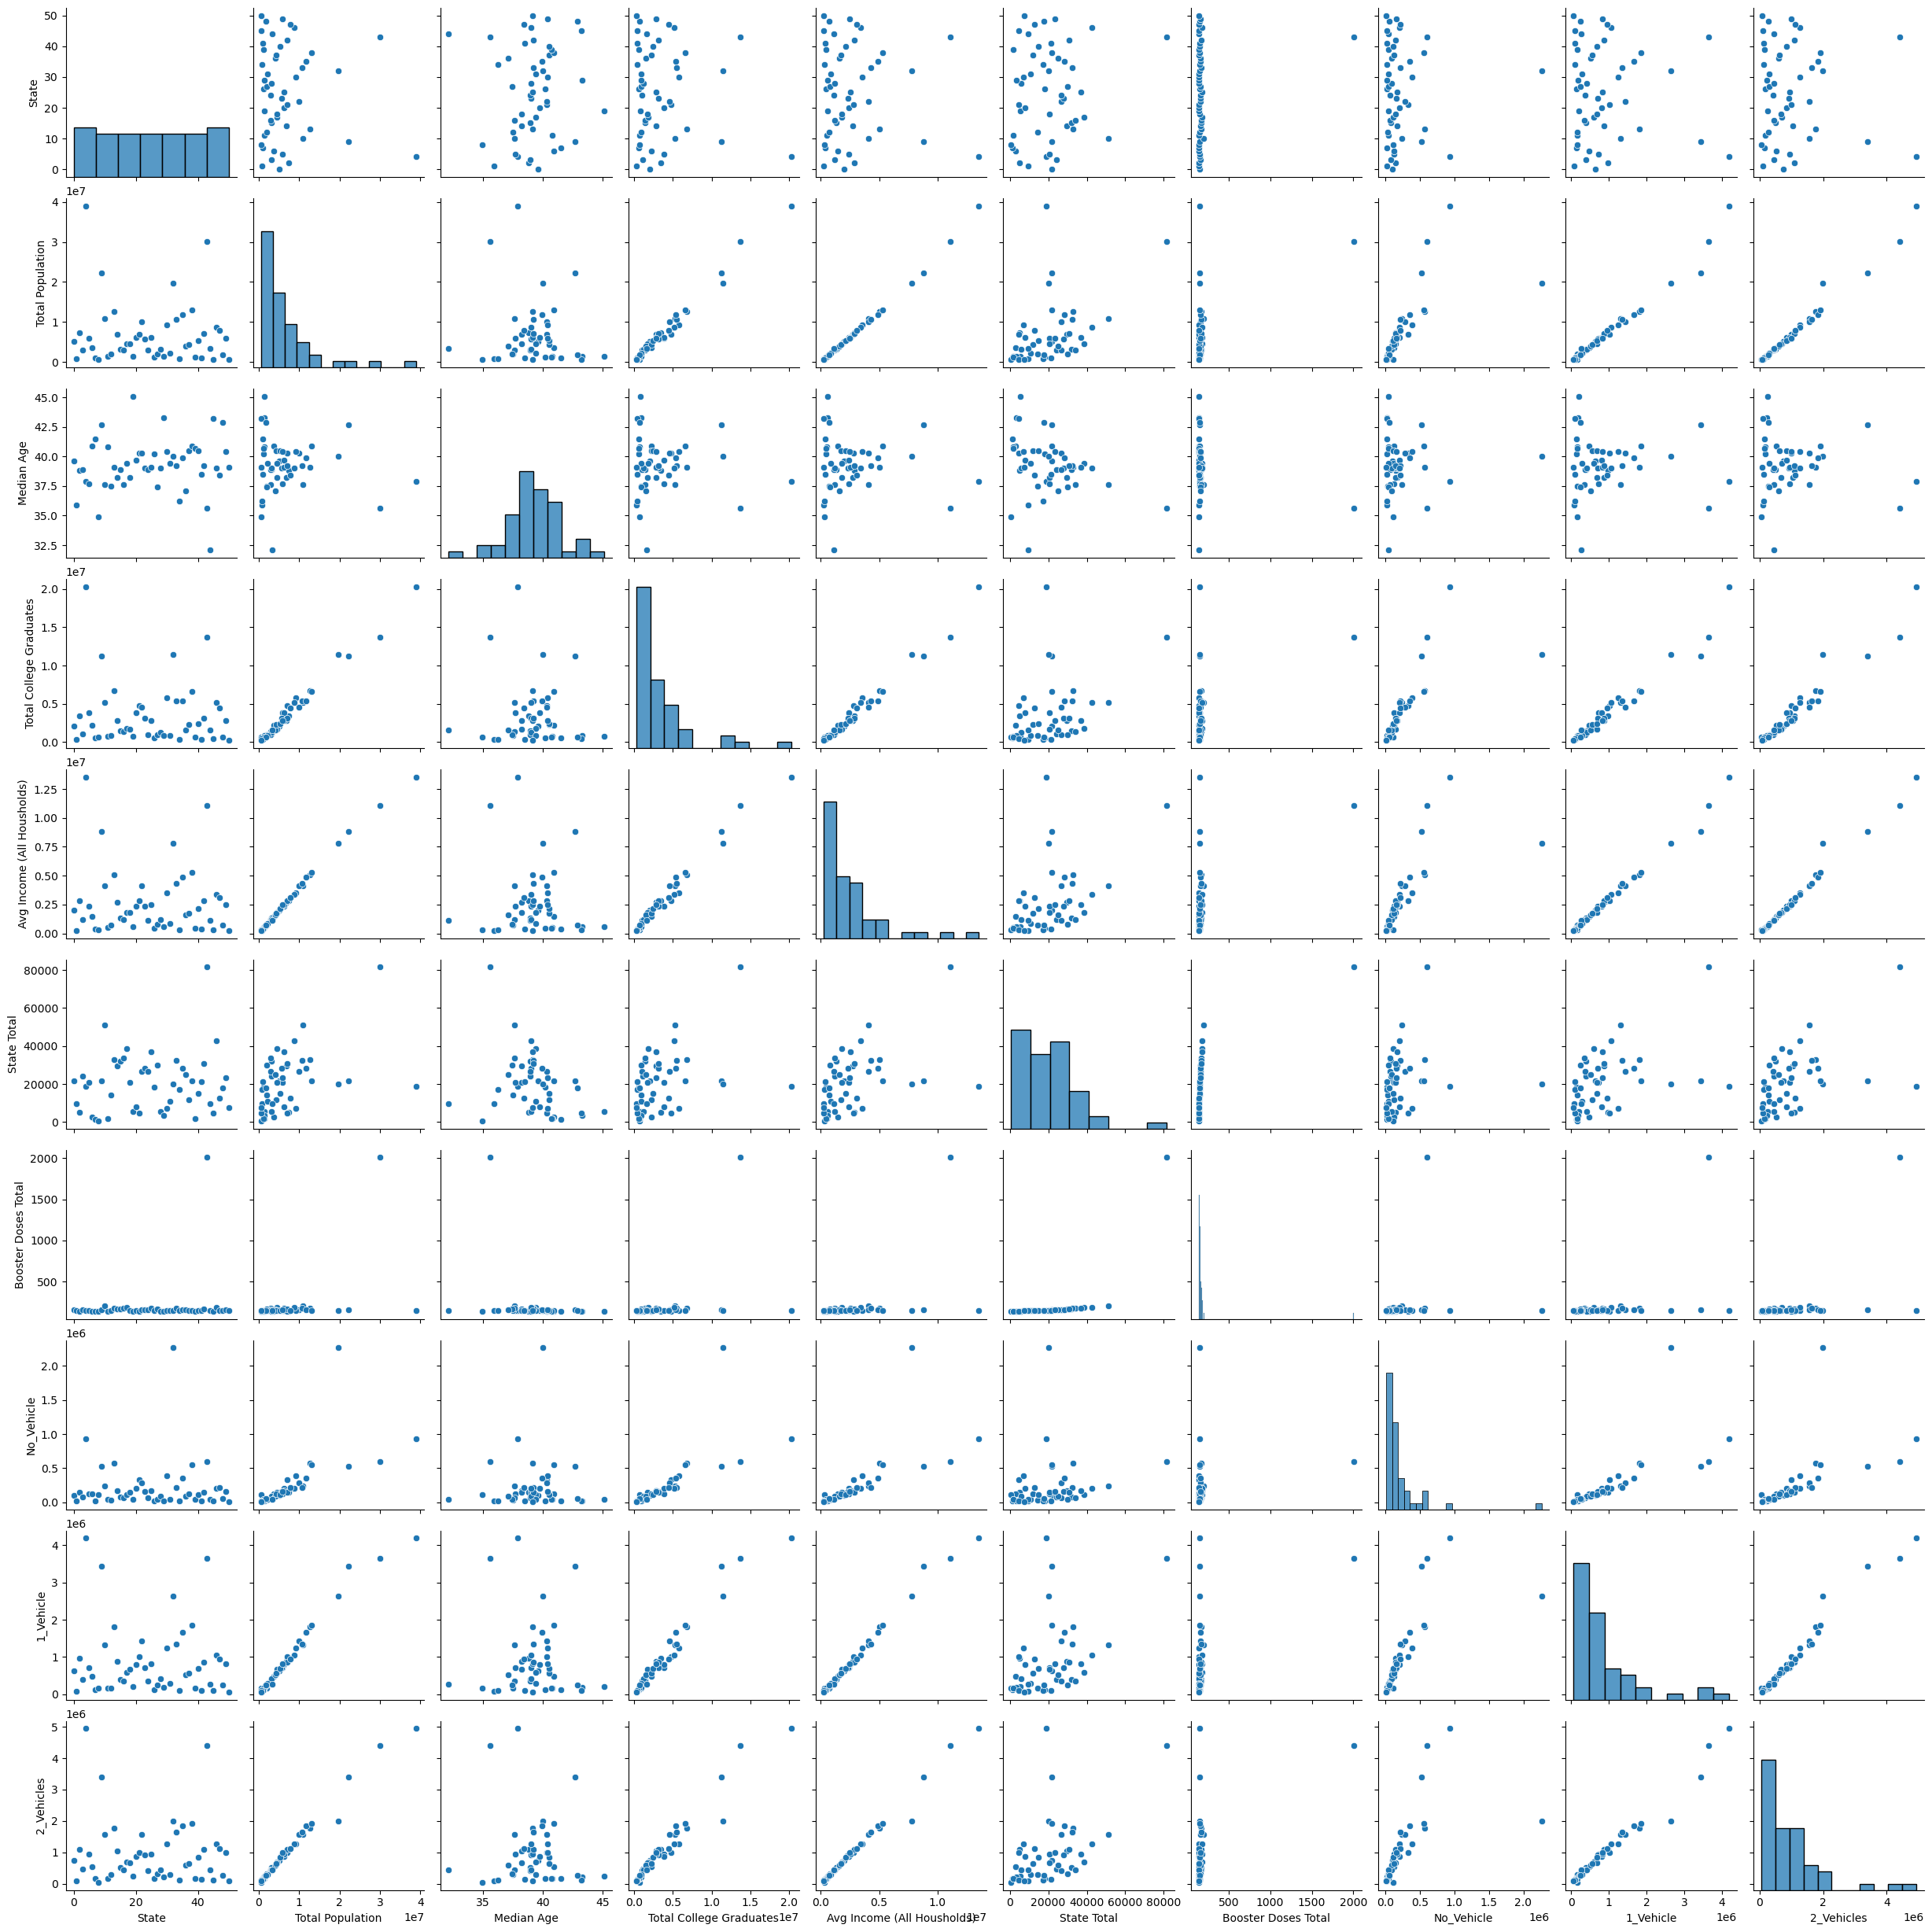

In [32]:
sns.pairplot(merged_df)

In [33]:
merged_df.isnull().sum()

State                         0
Total Population              0
Median Age                    0
Total College Graduates       0
Avg Income (All Housholds)    0
State Total                   0
Booster Doses Total           0
No_Vehicle                    0
1_Vehicle                     0
2_Vehicles                    0
dtype: int64

<Axes: >

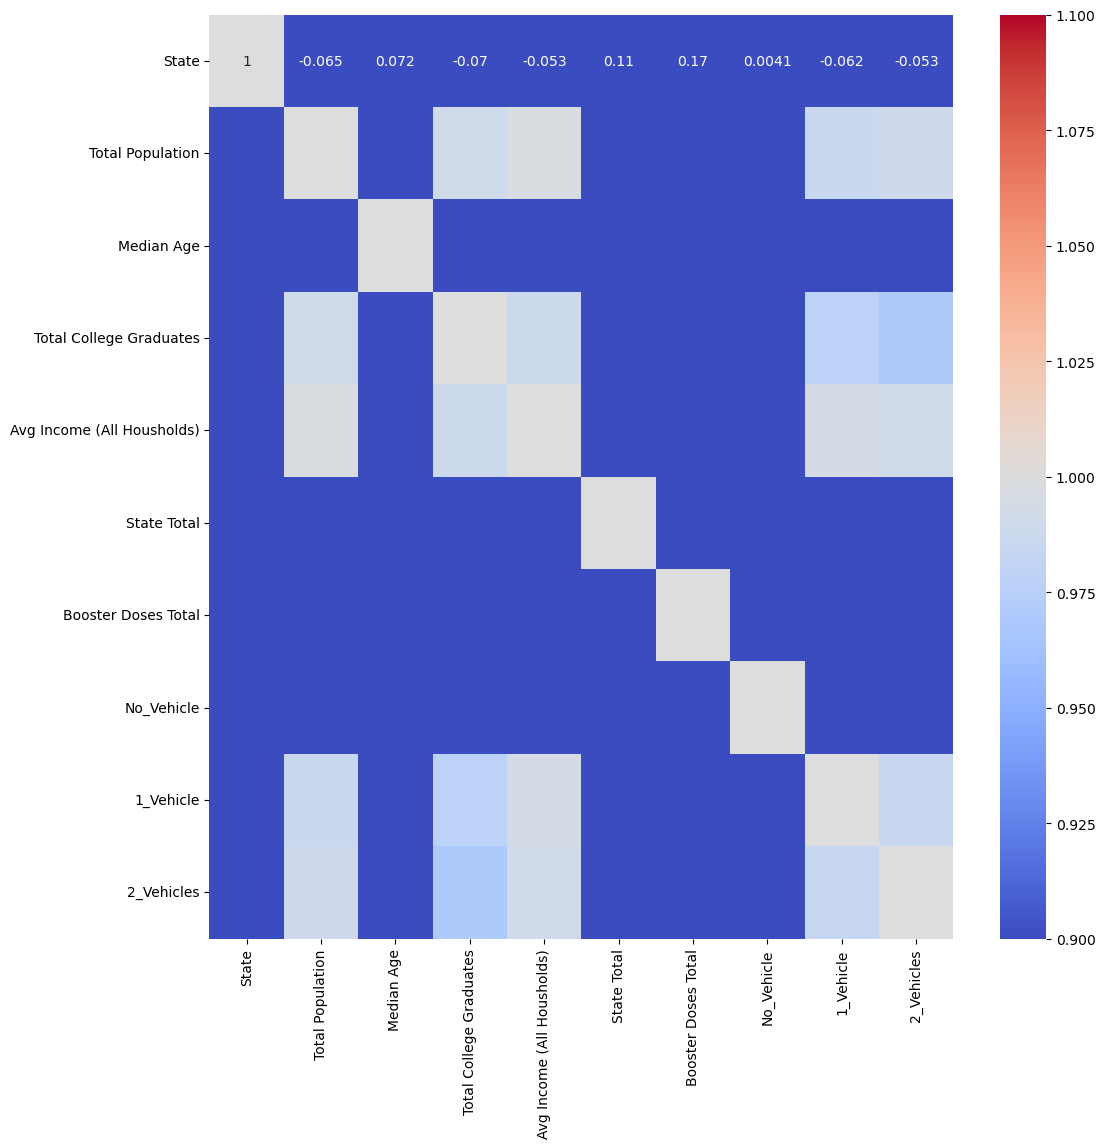

In [34]:
corr_matrix = merged_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm',vmin=1)


In [35]:
y = merged_df['Booster Doses Total']
merged_df.drop('Booster Doses Total', inplace=True, axis=1)
#merged_df.drop('State Total', inplace=True, axis=1)
merged_df.drop('State', inplace=True, axis=1)
#merged_df.drop('1_Vehicle', inplace=True, axis=1)
#merged_df.drop('2_Vehicles', inplace=True, axis=1)
X = merged_df

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 8), (11, 8), (40,), (11,))

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

poly = PolynomialFeatures(degree=12, include_bias=True)
X_train_poly_features = poly.fit_transform(X_train)
X_test_poly_features = poly.fit_transform(X_test)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly_features,y_train)


LinearRegression()

In [39]:
from sklearn.metrics import mean_squared_error
y_pred1 = linear_model.predict(X_test)

In [40]:
mse = mean_squared_error(y_test,y_pred1)
print("Linear Regression mean squared error (MSE): {:.2f}".format(mse))
print("Linear Regression root mean squared error (MSE): {:.2f}".format(np.sqrt(mse)))
print("Linear Regression Model Score: ",linear_model.score(X_test,y_test))
print("Linear Regression Model p-values: ")

Linear Regression mean squared error (MSE): 290010.78
Linear Regression root mean squared error (MSE): 538.53
Linear Regression Model Score:  -0.02725374711248585
Linear Regression Model p-values: 


In [41]:
from sklearn.metrics import r2_score
y_pred2 = poly_reg_model.predict(X_test_poly_features)
mse = mean_squared_error(y_test, y_pred2)
r_squared = r2_score(y_test, y_pred2)
print("Polynomial Regression Model Score: ", poly_reg_model.score(X_train_poly_features,y_train))
print("Polynomial Regression Model Root MSE: {:.2f}".format(mse))
print("Polynomial Regression Model Root MSE: {:.2f}".format(np.sqrt(mse)))

Polynomial Regression Model Score:  0.7156775923157233
Polynomial Regression Model Root MSE: 231455647476918878208.00
Polynomial Regression Model Root MSE: 15213666470.54


In [42]:
xtrain, xtest, ytrain, ytest =  train_test_split(X,y, test_size = 0.2, random_state=1238)

In [43]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1238)
regressor.fit(xtrain,ytrain)

DecisionTreeRegressor(random_state=1238)

In [44]:
ypred = regressor.predict(xtest)

In [45]:
print("Decision Tree Model Score: ", regressor.score(xtest,ytest))
print("Decision Tree Model Mean Squared Error: ",mean_squared_error(ytest,ypred))
print("Decision Tree Model Root Mean Squared Error: ",np.sqrt(mean_squared_error(ytest,ypred)))

Decision Tree Model Score:  0.11415929203539821
Decision Tree Model Mean Squared Error:  182.0
Decision Tree Model Root Mean Squared Error:  13.490737563232042


In [46]:
import statsmodels.api as sm
linear_model2 = sm.OLS(y, X).fit()

In [47]:
summary=linear_model2.summary()
print(summary)

                                 OLS Regression Results                                 
Dep. Variable:     Booster Doses Total   R-squared (uncentered):                   0.883
Model:                             OLS   Adj. R-squared (uncentered):              0.861
Method:                  Least Squares   F-statistic:                              40.39
Date:                 Sun, 05 May 2024   Prob (F-statistic):                    1.52e-17
Time:                         20:40:24   Log-Likelihood:                         -311.96
No. Observations:                   51   AIC:                                      639.9
Df Residuals:                       43   BIC:                                      655.4
Df Model:                            8                                                  
Covariance Type:             nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------